In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [50]:
data =pd.read_csv('bank-additional-full.csv', delimiter=';')

In [51]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [52]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [53]:
data.shape


(41188, 21)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [55]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [56]:
data.duplicated().sum()

12

In [57]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [58]:
for i in data.select_dtypes(include ="object").columns:
    print(data[i].value_counts())
    print("-------"*10)

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
----------------------------------------------------------------------
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
----------------------------------------------------------------------
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
----------------------------------------------------------------------
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
----------------------

In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [60]:
data.describe(include="object").T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


KeyboardInterrupt: 

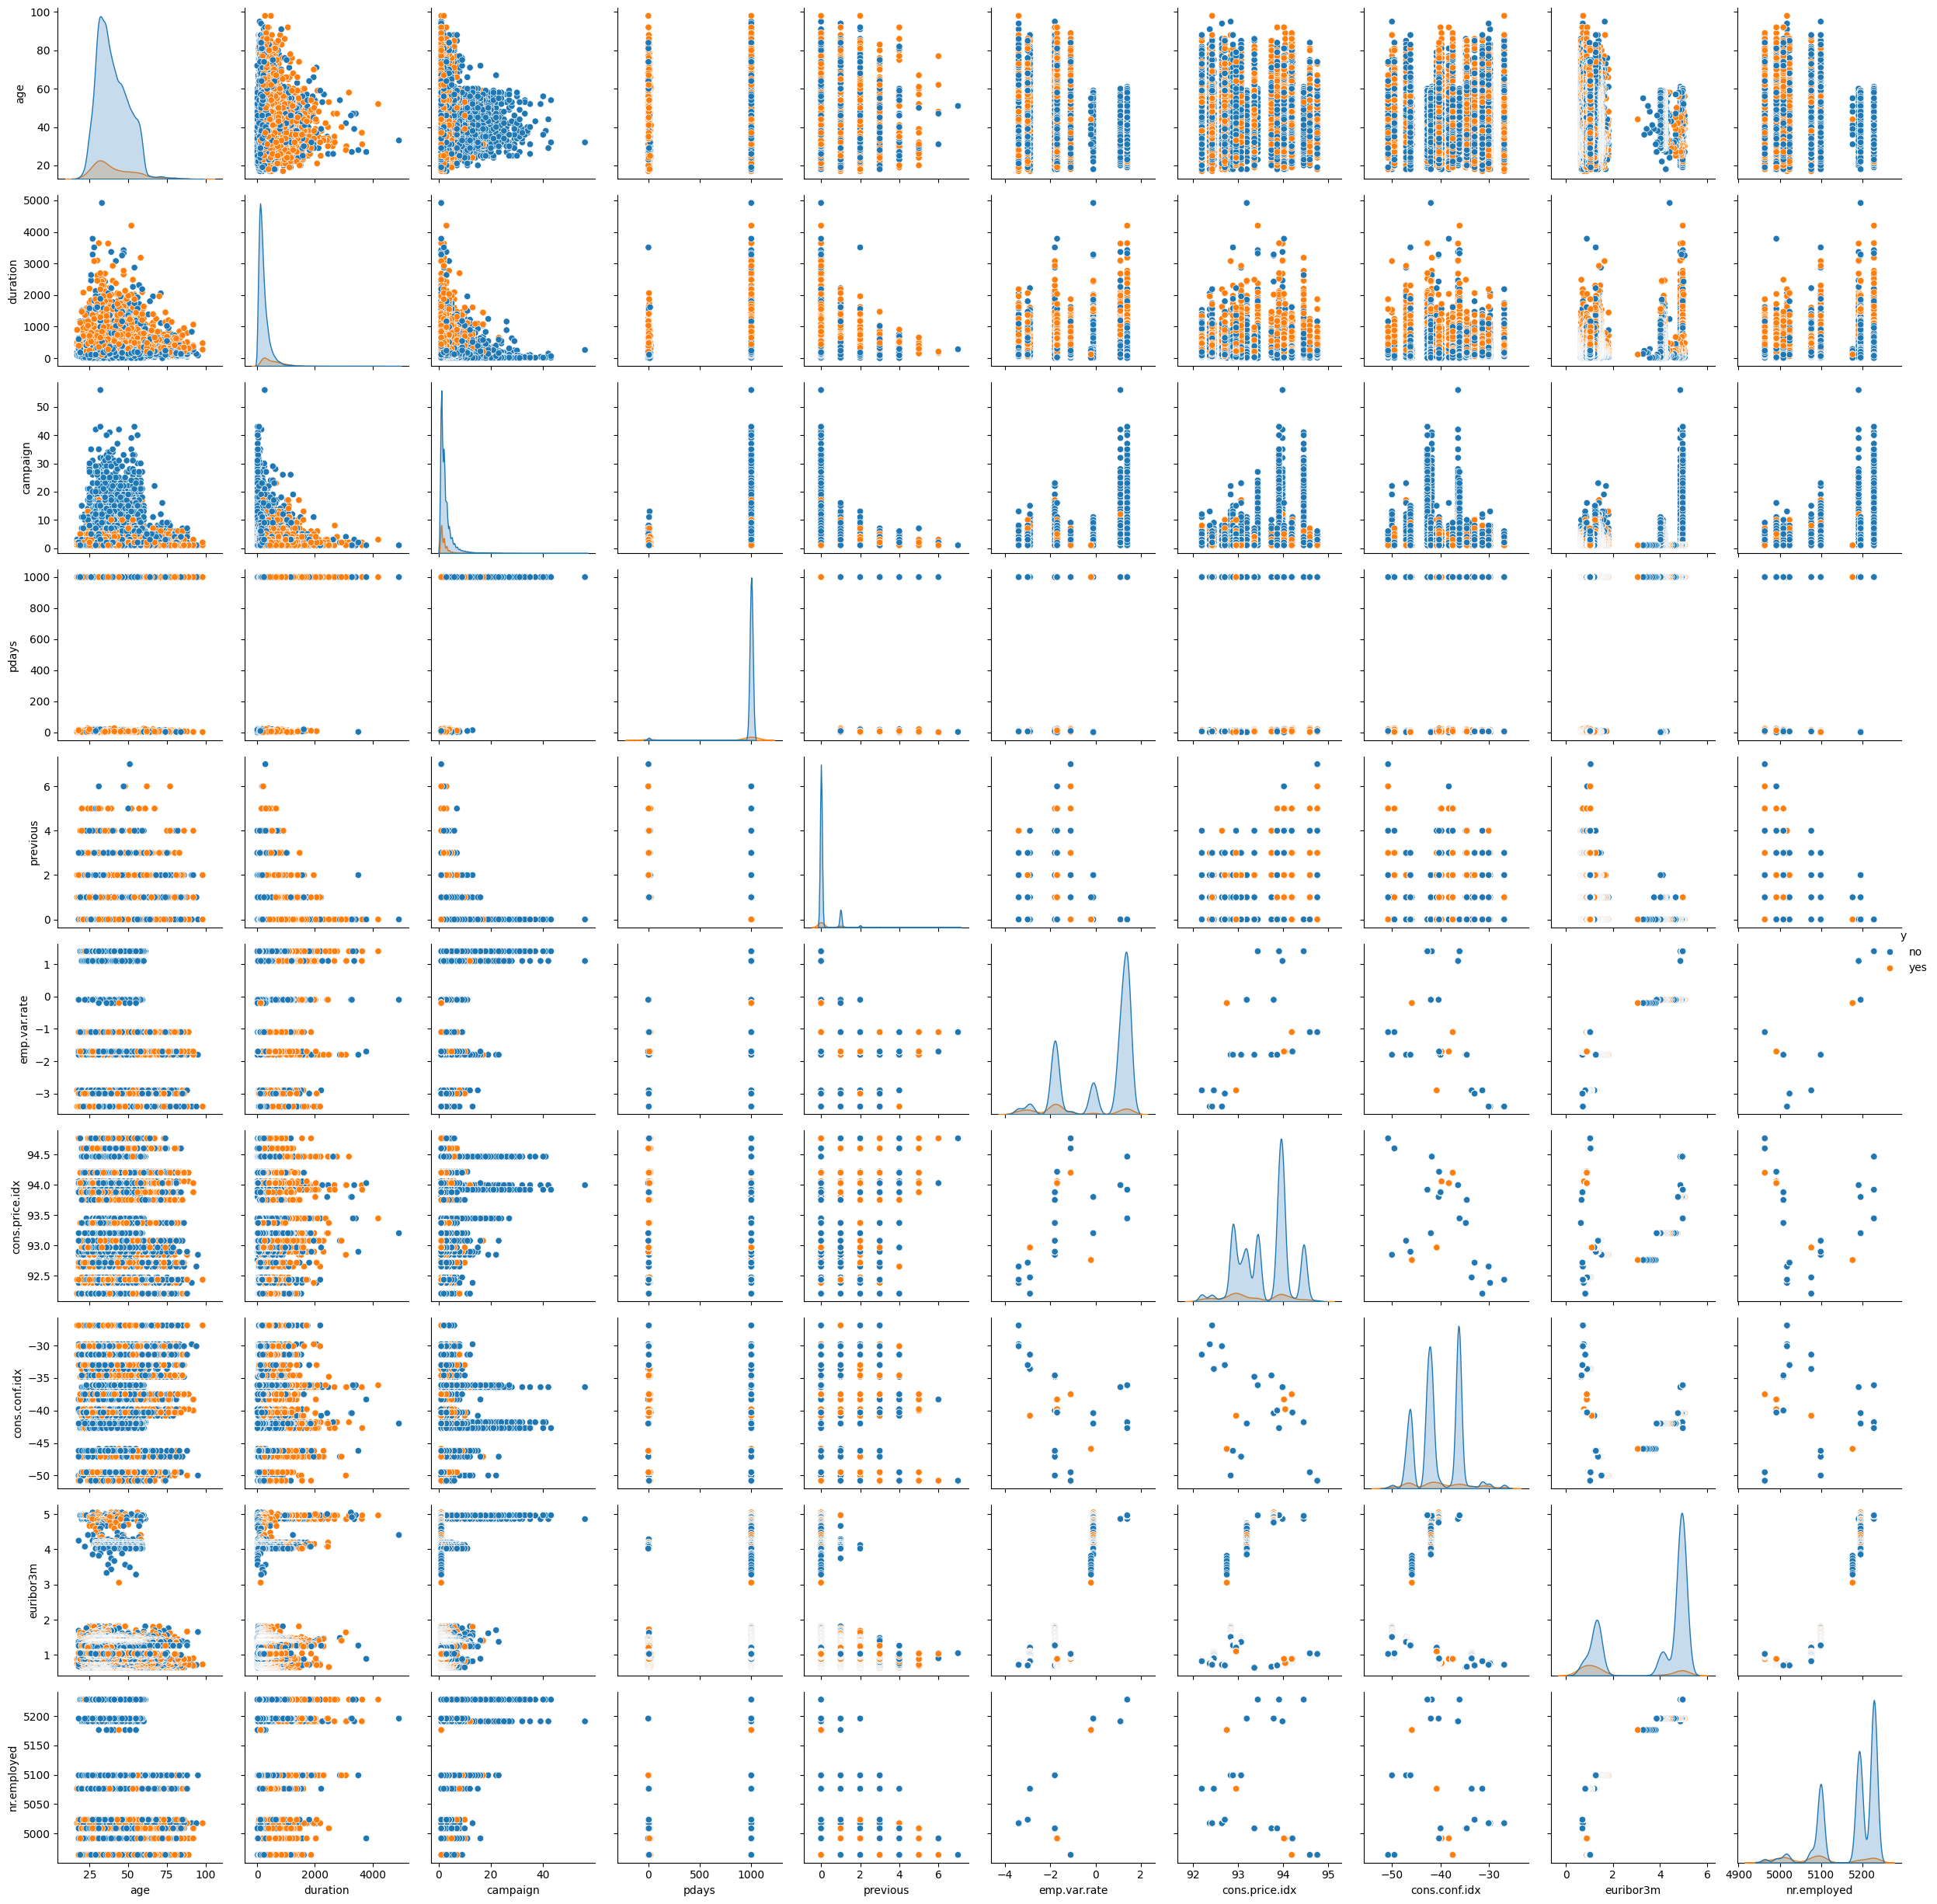

In [164]:
sns.pairplot(data, hue='y')

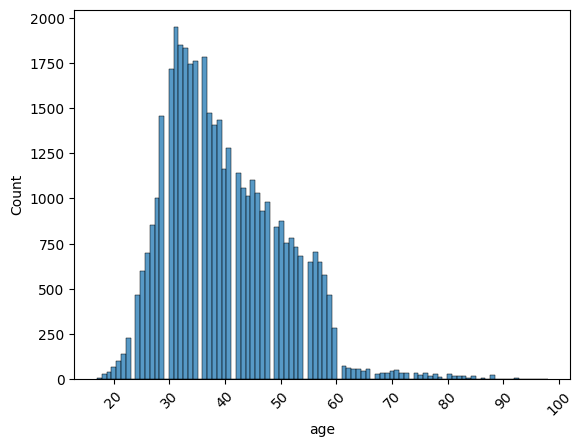

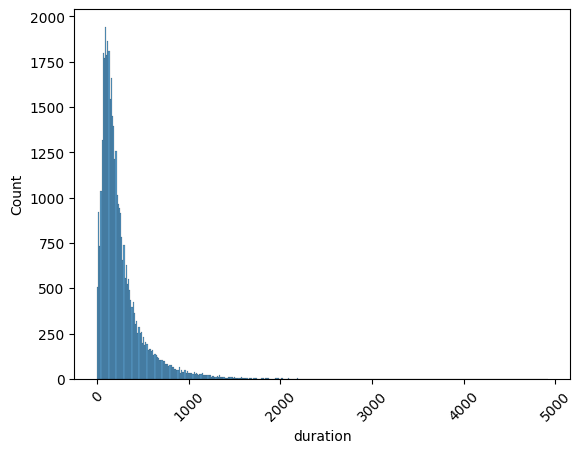

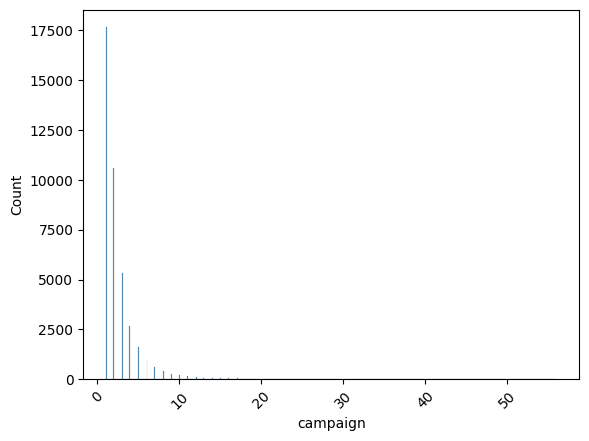

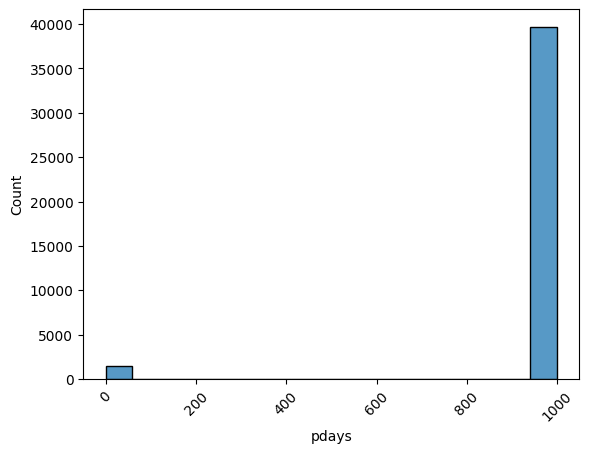

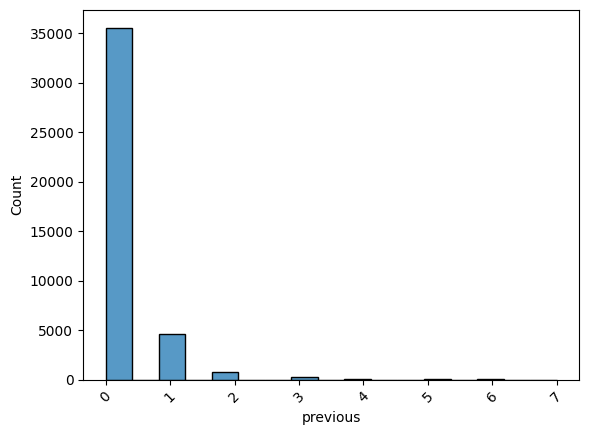

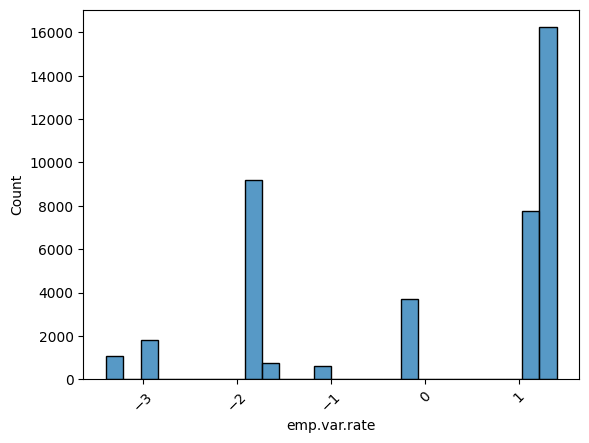

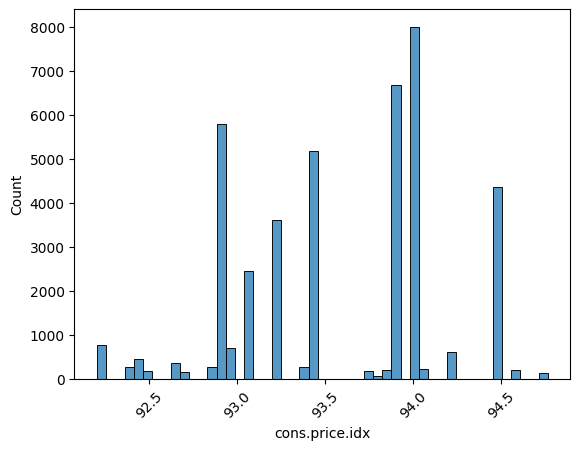

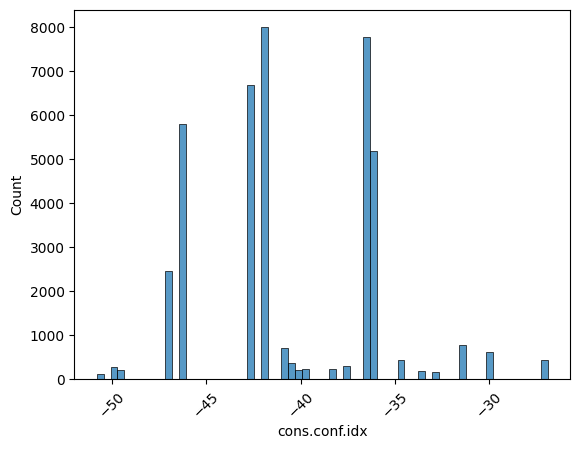

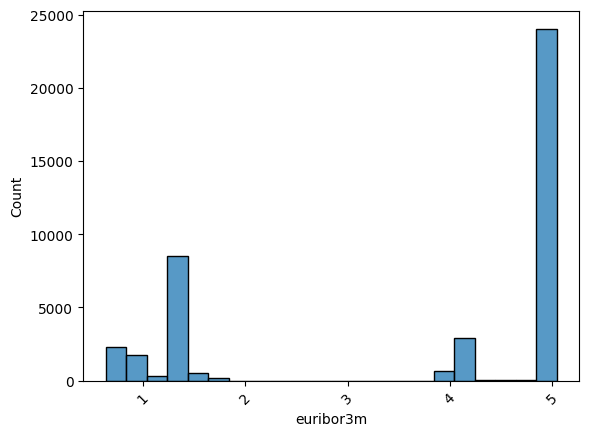

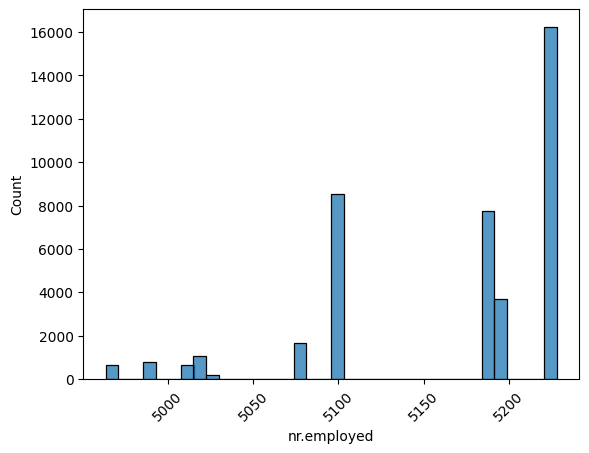

In [61]:
for i in data.select_dtypes(include ="number").columns:
    sns.histplot(data=data,x=i)
    plt.xticks(rotation=45)
    plt.show()

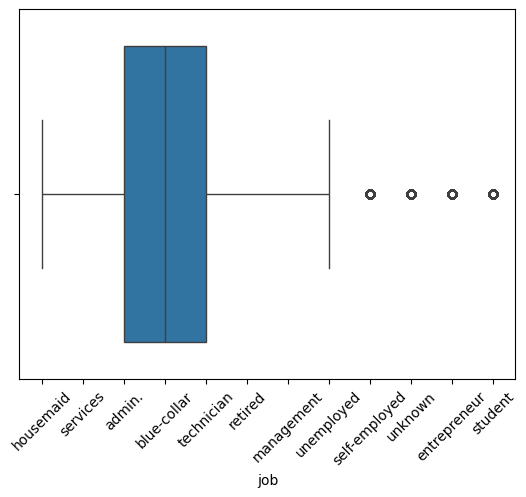

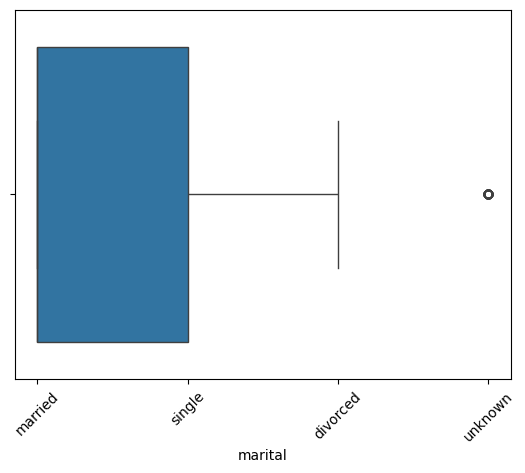

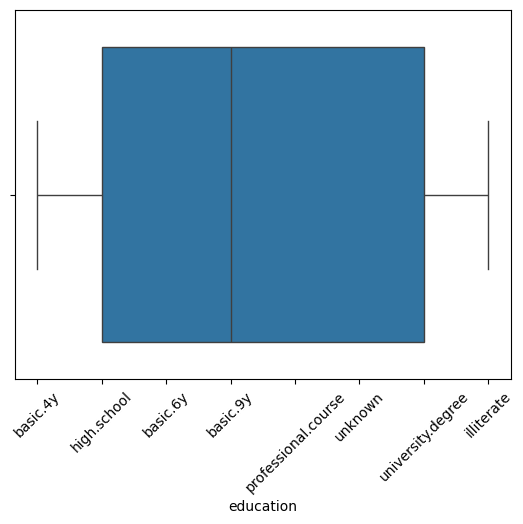

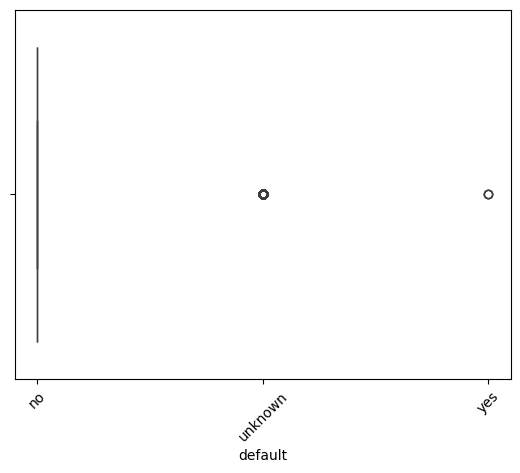

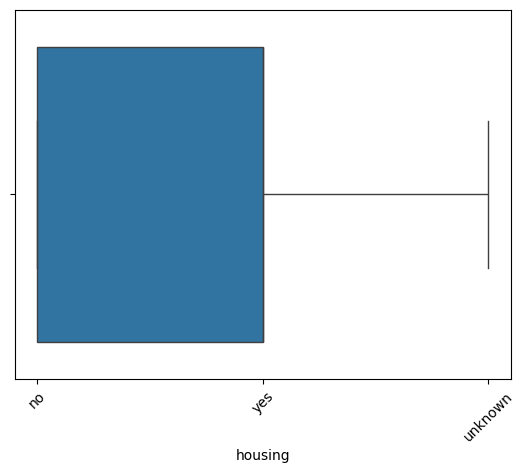

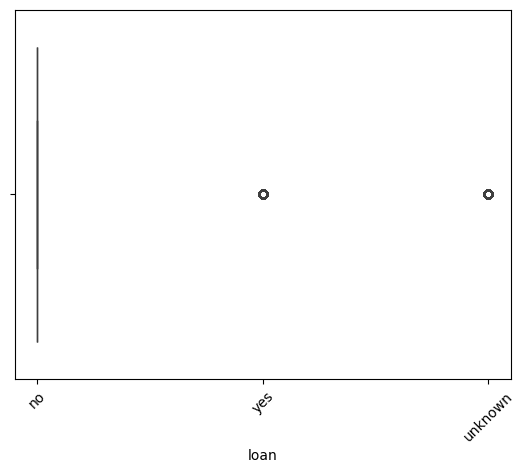

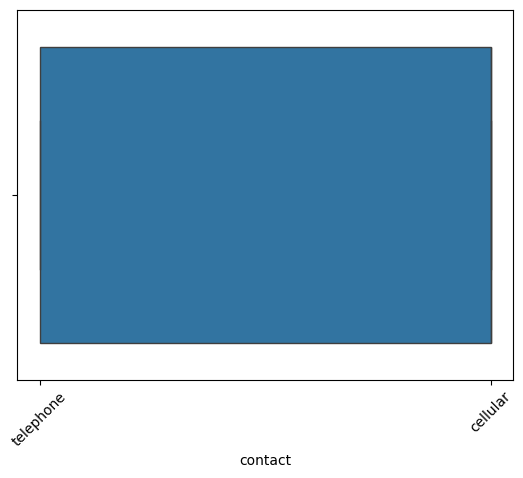

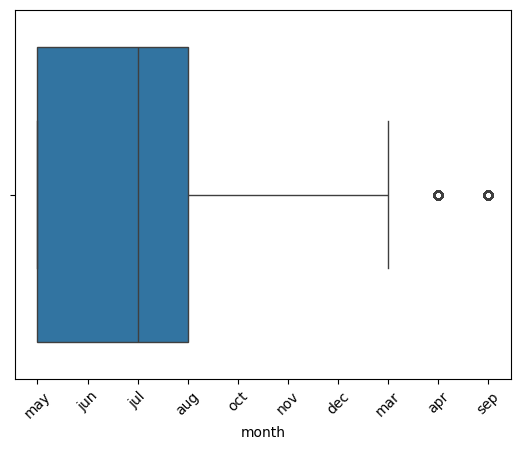

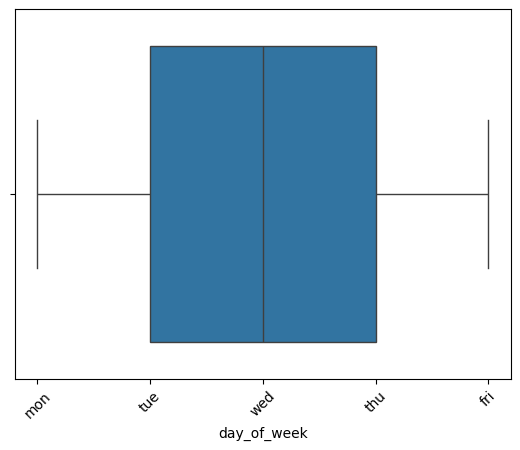

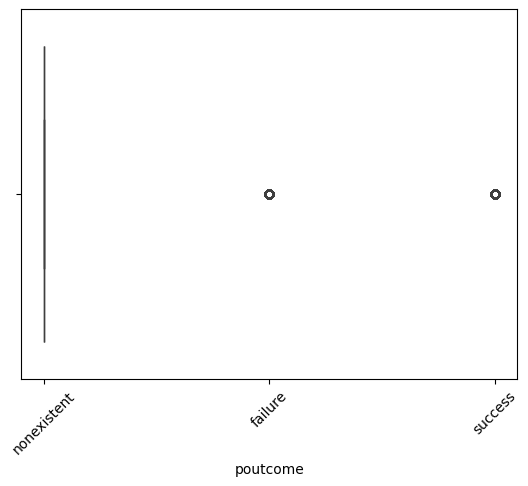

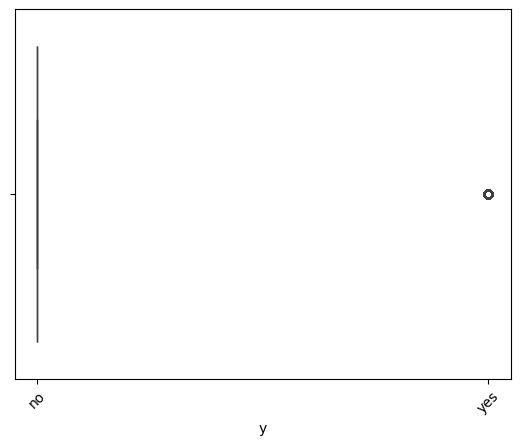

In [62]:
for i in data.select_dtypes(include ="object").columns:
    sns.boxplot(data=data,x=i)
    plt.xticks(rotation=45)
    plt.show()

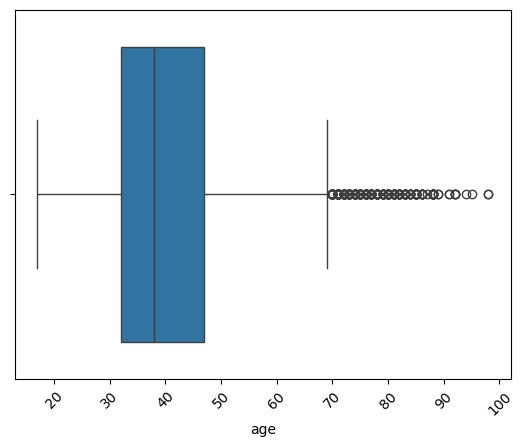

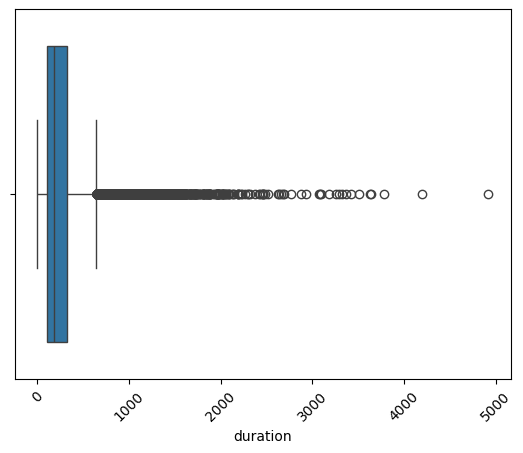

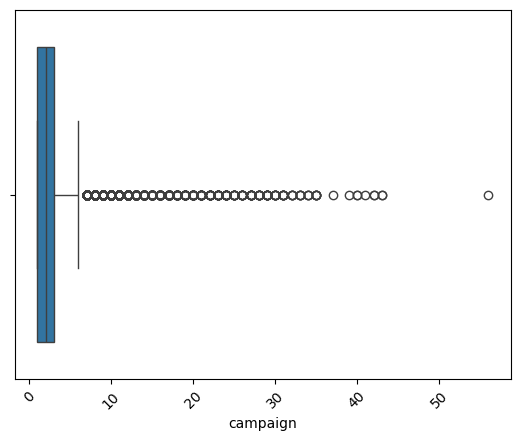

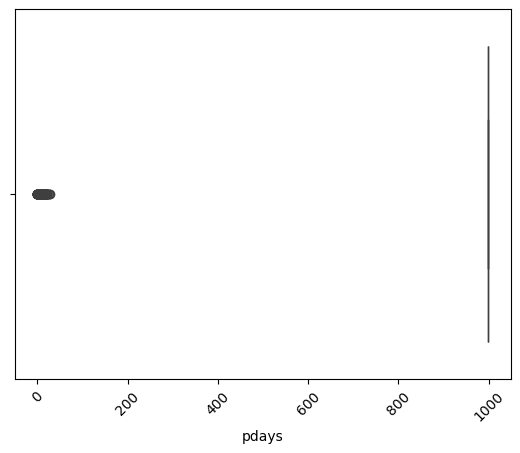

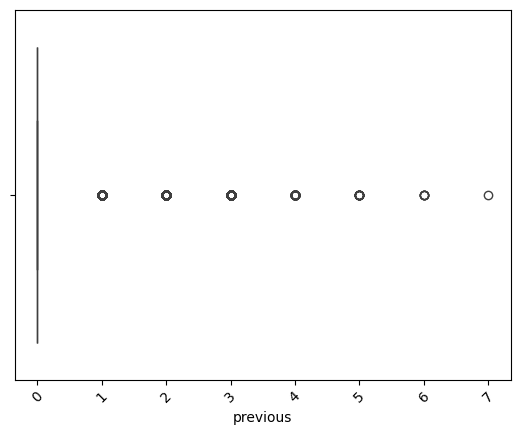

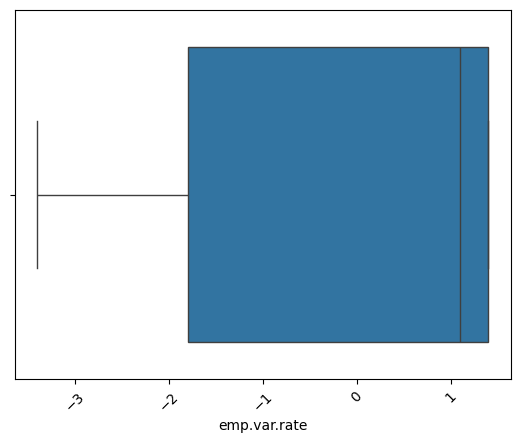

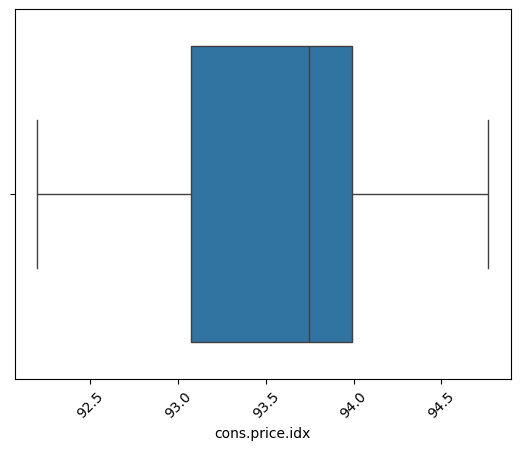

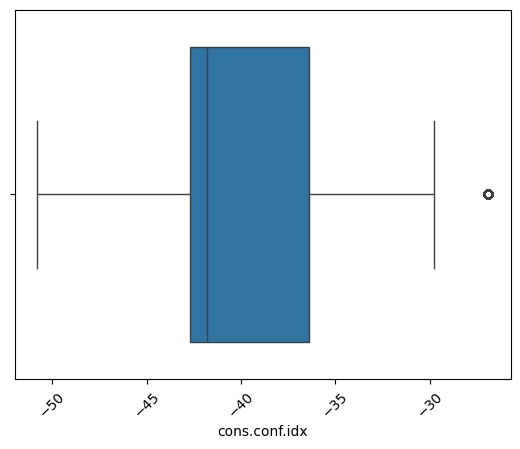

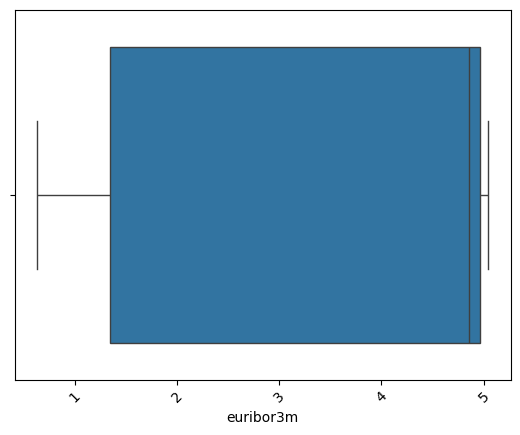

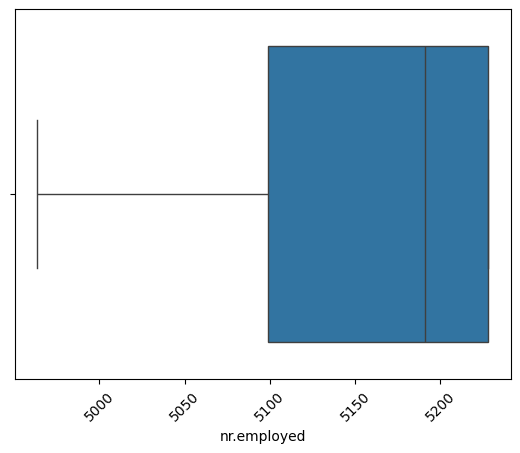

In [63]:
for i in data.select_dtypes(include ="number").columns:
    sns.boxplot(data=data,x=i)
    plt.xticks(rotation=45)
    plt.show()

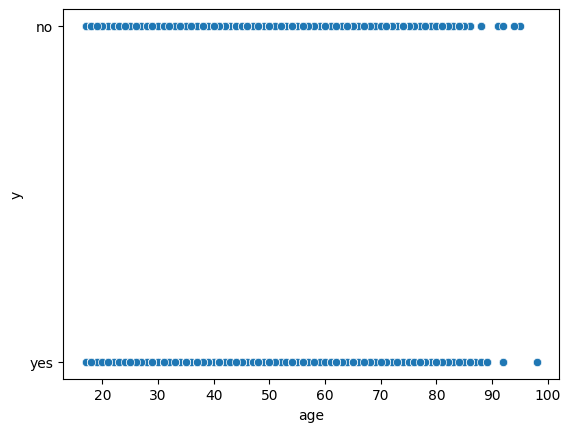

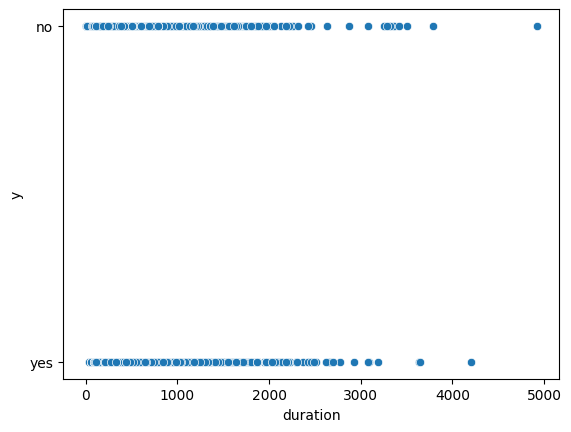

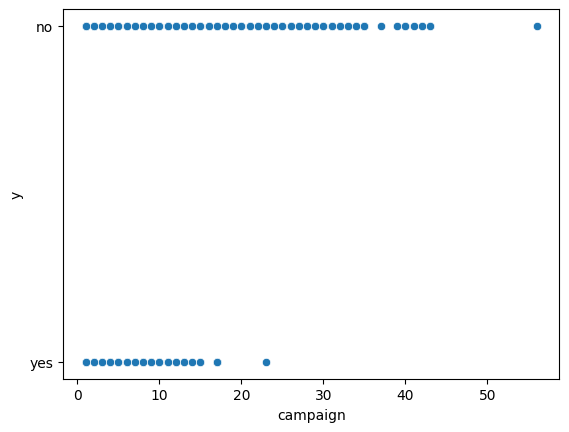

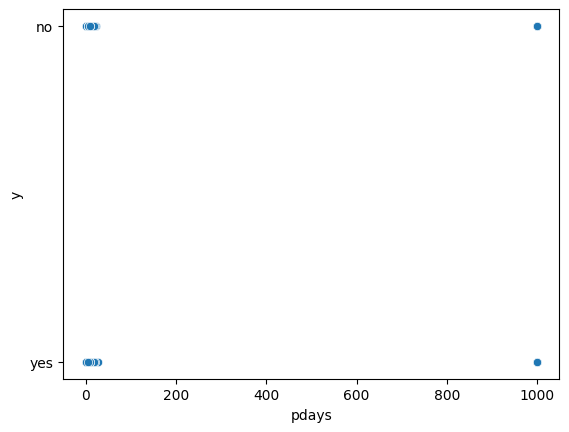

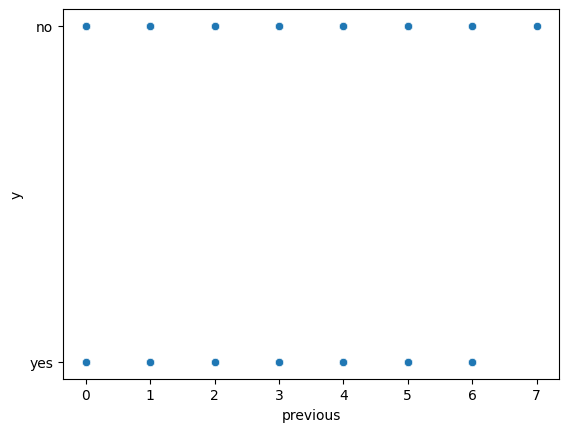

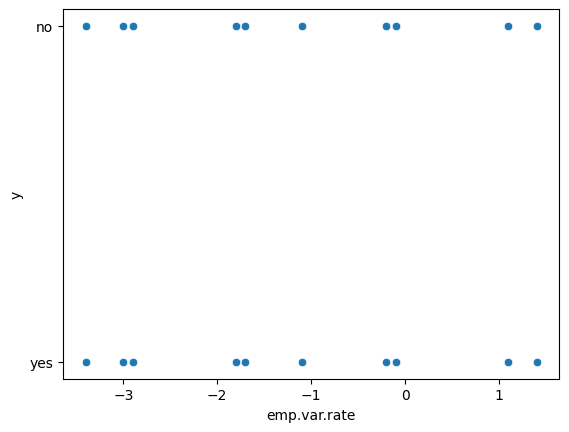

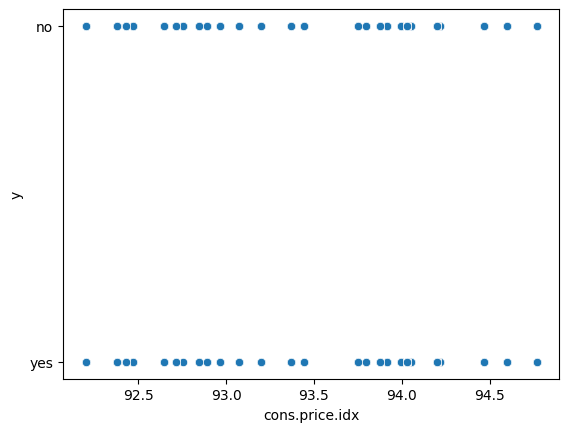

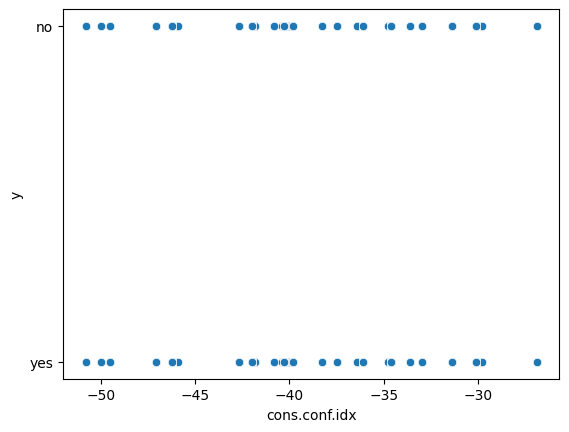

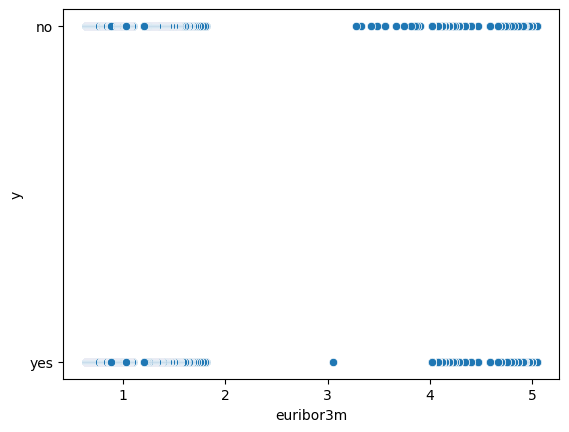

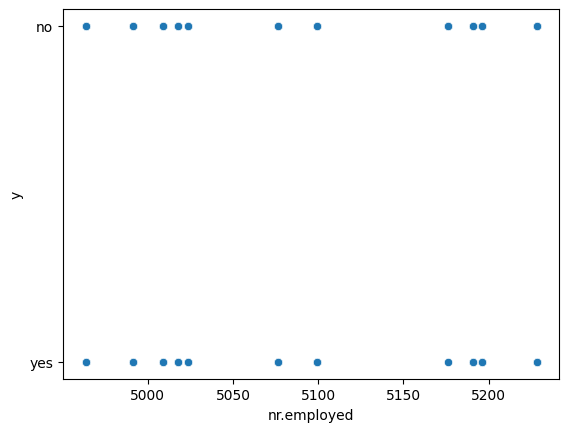

In [64]:
for i in ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']:
    sns.scatterplot(data=data,x=i,y='y')
    plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
encoded_data1=data.copy()

In [67]:
label_encoders = {}
for column in encoded_data1.select_dtypes(include='object').columns:
    le = LabelEncoder()
    encoded_data1[column] = le.fit_transform(encoded_data1[column])
    label_encoders[column] = le

In [68]:
encoded_data1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [69]:
encoded_data1.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,...,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,...,-0.006923,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,...,-0.007240,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,...,0.000371,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,...,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,...,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,...,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,...,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.024877,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,...,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.017572,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,...,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967


<Axes: >

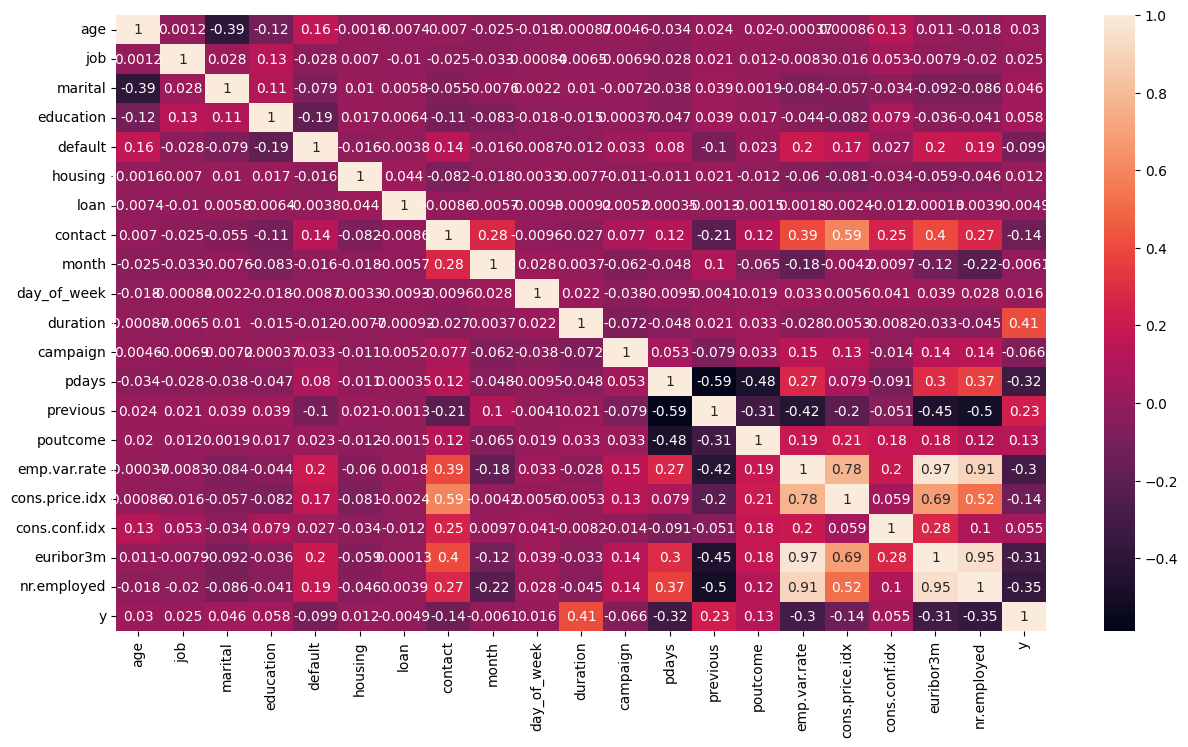

In [70]:
plt.figure(figsize=(15, 8))
sns.heatmap(encoded_data1.corr(), annot=True)



In [71]:
for col in data.select_dtypes(include=['object']).columns:
    unknown_ratio = data[col].value_counts(normalize=True).get('unknown', 0)
    print(f"{col}: {unknown_ratio:.2%} unknown values")

job: 0.80% unknown values
marital: 0.19% unknown values
education: 4.20% unknown values
default: 20.87% unknown values
housing: 2.40% unknown values
loan: 2.40% unknown values
contact: 0.00% unknown values
month: 0.00% unknown values
day_of_week: 0.00% unknown values
poutcome: 0.00% unknown values
y: 0.00% unknown values


In [72]:
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    mode_value = data[col].mode()[0]
    data[col] = data[col].replace('unknown', mode_value)


In [73]:
for col in data.select_dtypes(include=['object']).columns:
    unknown_ratio = data[col].value_counts(normalize=True).get('unknown', 0)
    print(f"{col}: {unknown_ratio:.2%} unknown values")

job: 0.00% unknown values
marital: 0.00% unknown values
education: 0.00% unknown values
default: 0.00% unknown values
housing: 0.00% unknown values
loan: 0.00% unknown values
contact: 0.00% unknown values
month: 0.00% unknown values
day_of_week: 0.00% unknown values
poutcome: 0.00% unknown values
y: 0.00% unknown values


In [74]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
continuous_cols = [col for col in numerical_cols if data[col].nunique() > 10]

print("Continuous numerical columns:", continuous_cols)


Continuous numerical columns: ['age', 'duration', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [75]:
Q1 = encoded_data1['duration'].quantile(0.1)
Q3 = encoded_data1['duration'].quantile(0.9)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


encoded_data1['duration'] = encoded_data1['duration'].clip(lower=lower_bound, upper=upper_bound)


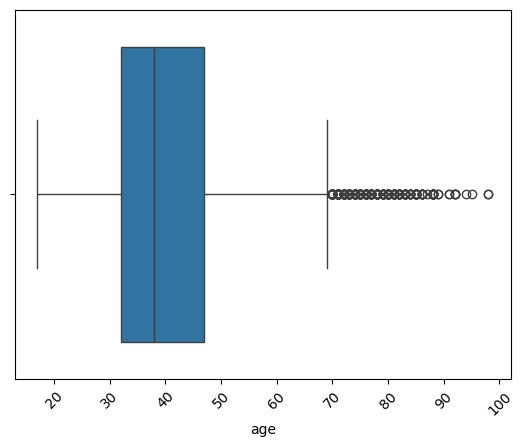

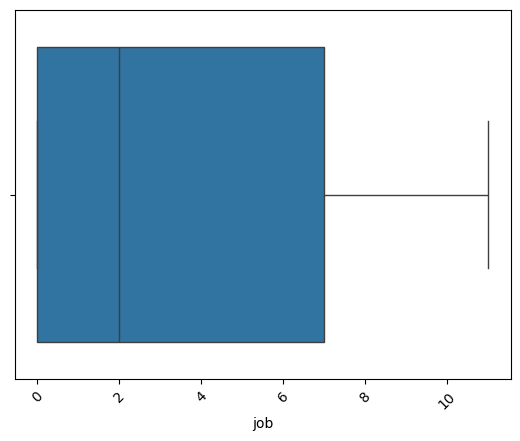

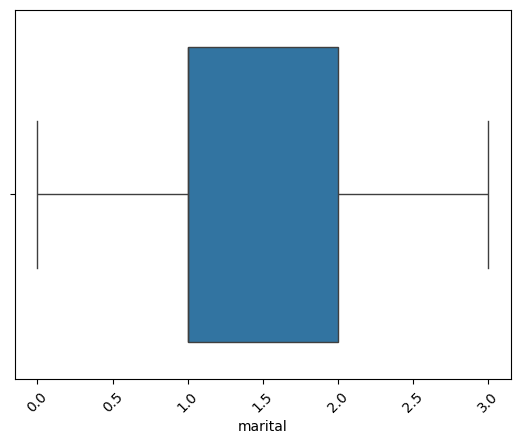

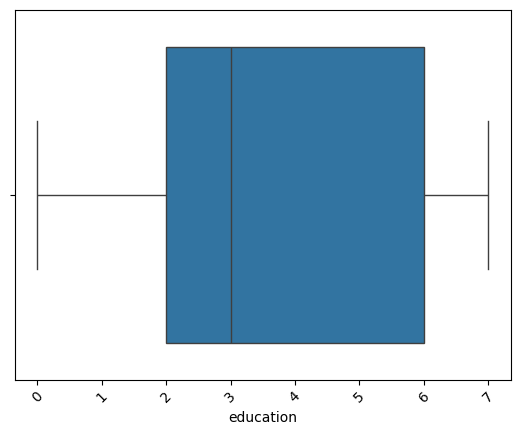

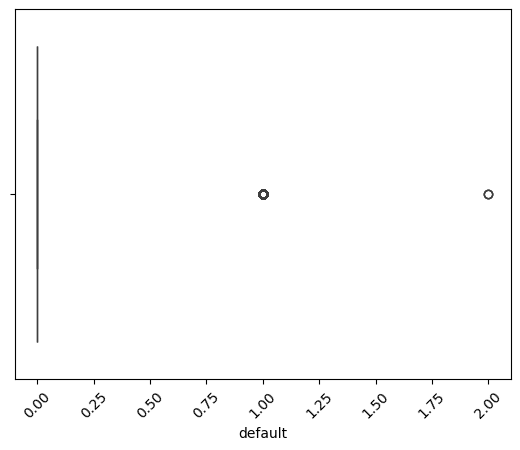

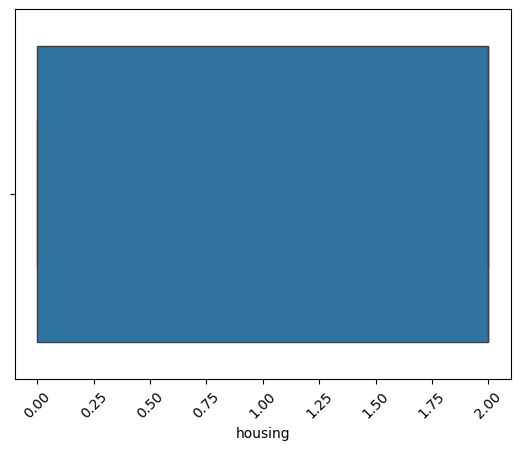

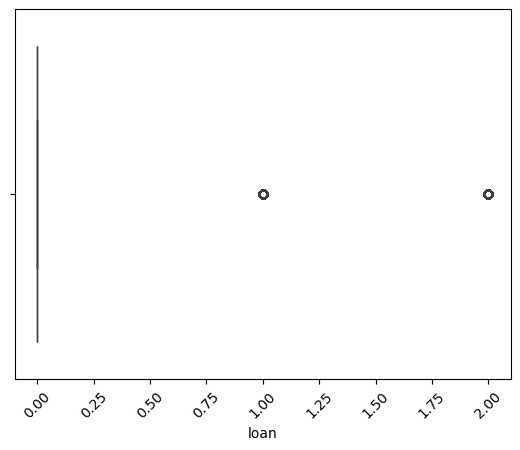

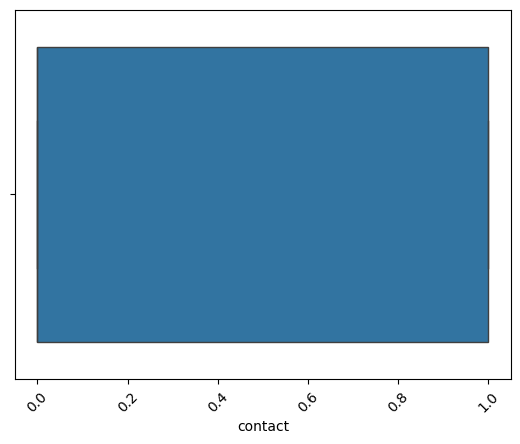

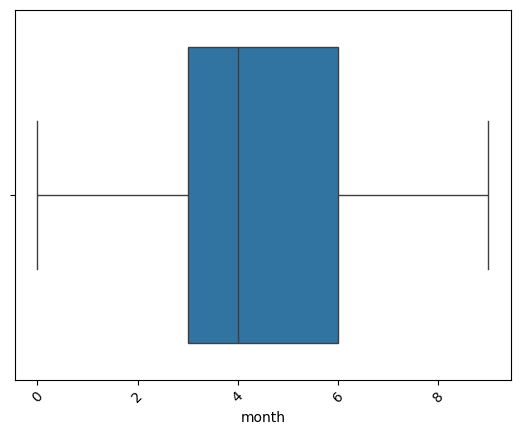

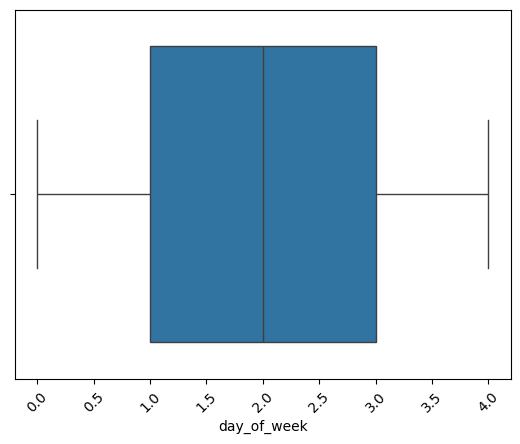

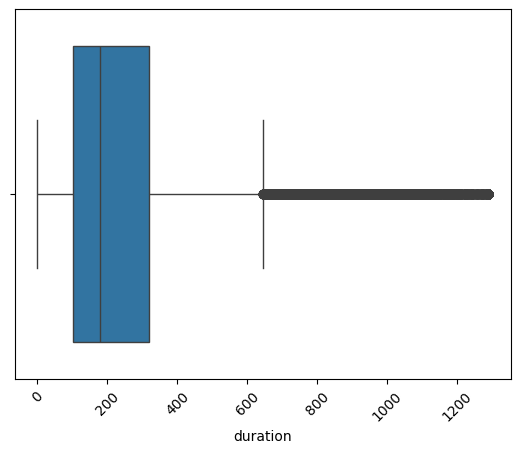

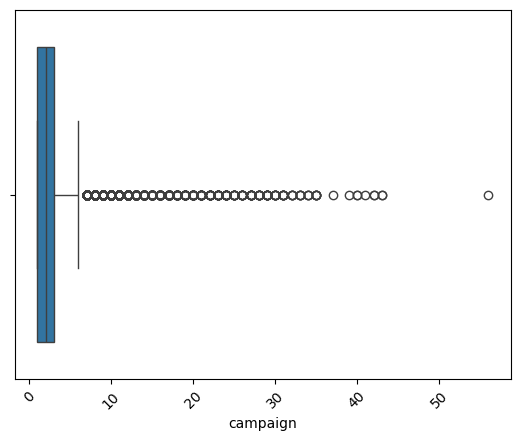

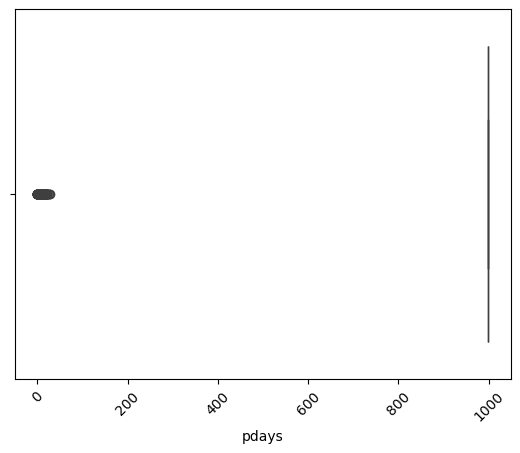

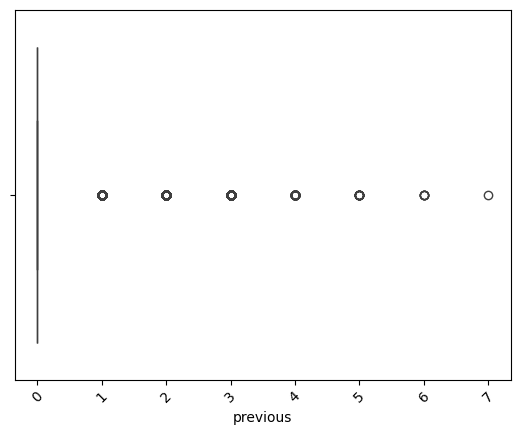

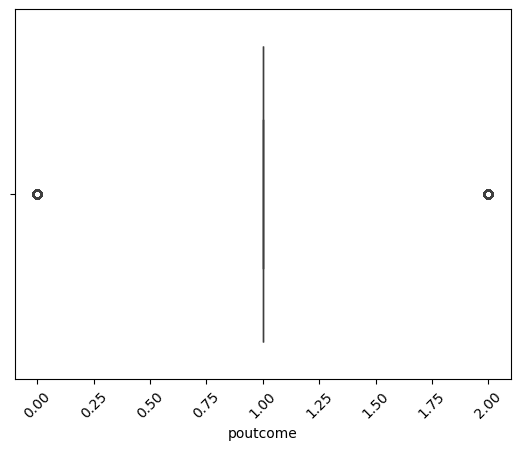

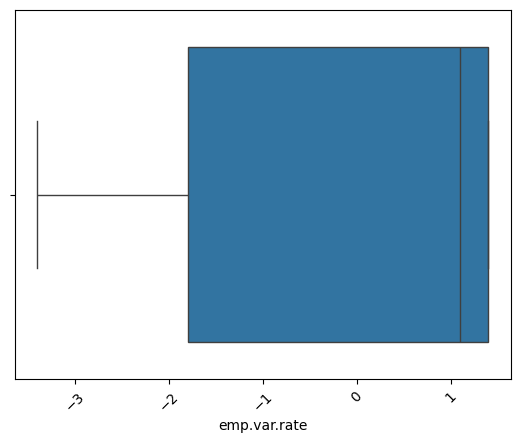

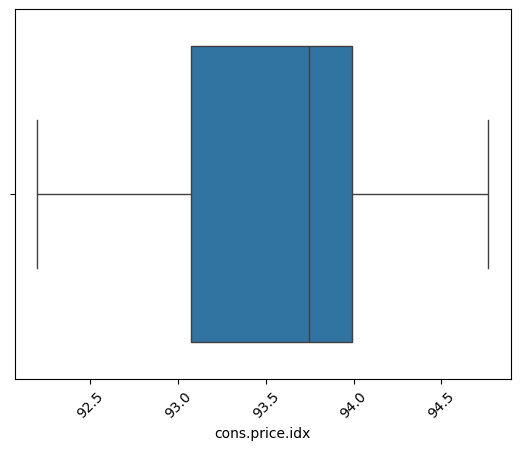

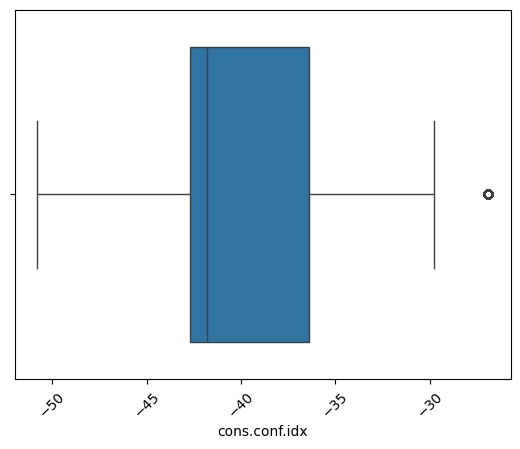

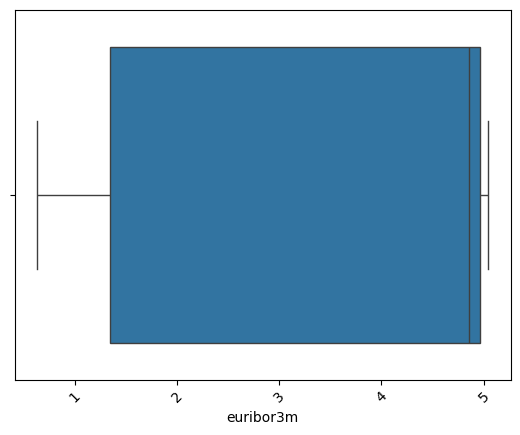

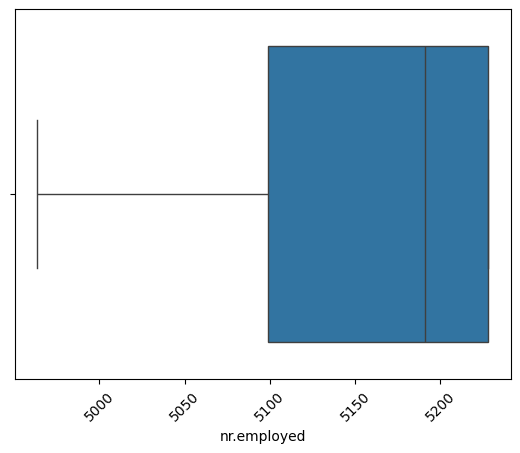

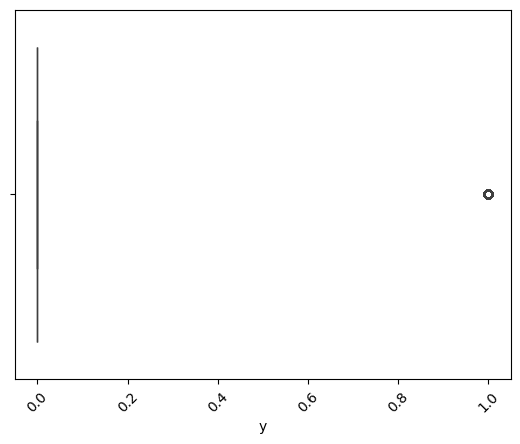

In [76]:
for i in encoded_data1.select_dtypes(include ="number").columns:
    sns.boxplot(data=encoded_data1,x=i)
    plt.xticks(rotation=45)
    plt.show()

In [77]:
encoded_data1.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


4640


y
0    36548
1     4640
Name: count, dtype: int64


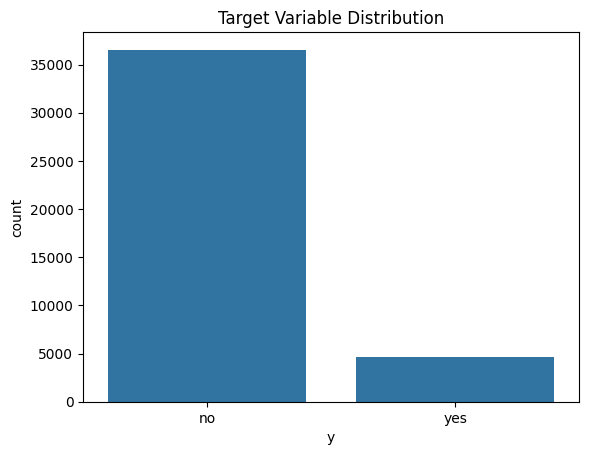

In [78]:
print(encoded_data1['y'].value_counts())
sns.countplot(data=data, x='y')
plt.title("Target Variable Distribution")
plt.show()

In [79]:
from sklearn.utils import resample


In [80]:
minority_class = encoded_data1[encoded_data1['y'] == 1]

majority_class = encoded_data1[encoded_data1['y'] == 0]
majority_class_downsampled = resample(

majority_class,

replace=False,

n_samples=4640,
random_state=42
)
balanced_data = pd.concat([majority_class_downsampled, minority_class])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [81]:
balanced_data['y'].value_counts()

,count
y,
0,4640
1,4640


In [82]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [83]:
y=balanced_data['y']

In [84]:
balanced_data.drop(columns=['y'], inplace=True)

In [85]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(balanced_data)
scaled_data = pd.DataFrame(scaled_data, columns=balanced_data.columns)
scaled_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.719243,0.047505,-0.332800,0.983287,-0.440314,-1.099456,-0.449900,-0.62371,-1.285181,-0.747343,-0.943329,1.162836,0.3543,-0.448362,0.027923,1.100608,-0.051666,0.765017,1.059399,1.066480
1,1.052834,-1.056681,-1.953147,-0.430039,-0.440314,0.932195,-0.449900,-0.62371,-0.085052,-0.747343,-0.962310,-0.582523,0.3543,0.983927,-2.113639,-1.394842,-0.813195,-0.112516,-0.898076,-0.683427
2,0.052061,-0.504588,1.287548,-0.430039,-0.440314,0.932195,-0.449900,1.60331,-0.485095,-0.031621,-0.962310,-0.582523,0.3543,-0.448362,0.027923,1.100608,0.698781,-0.467264,1.057811,1.066480
3,-1.115508,1.151691,1.287548,0.983287,-0.440314,-1.099456,2.326078,-0.62371,1.115077,-0.747343,-0.810460,-0.582523,0.3543,-0.448362,0.027923,-1.685010,-1.310326,1.885272,-1.189659,-1.359659
4,-1.032110,0.047505,-0.332800,0.983287,-0.440314,0.932195,2.326078,-0.62371,-0.485095,1.399822,-0.142953,0.726496,0.3543,-0.448362,0.027923,1.100608,0.698781,-0.467264,1.058341,1.066480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,-0.865314,1.427737,-0.332800,0.512178,-0.440314,-1.099456,-0.449900,1.60331,-1.285181,1.399822,0.856727,2.035516,0.3543,-0.448362,0.027923,1.100608,-0.051666,0.765017,1.058870,1.066480
9276,-1.115508,0.875644,1.287548,-0.430039,-0.440314,-1.099456,-0.449900,-0.62371,-0.485095,-0.747343,2.204396,0.290157,0.3543,-0.448362,0.027923,1.100608,0.698781,-0.467264,1.057811,1.066480
9277,-0.114735,-1.056681,-0.332800,0.983287,-0.440314,-1.099456,-0.449900,-0.62371,-0.485095,-1.463065,1.166754,4.653555,0.3543,-0.448362,0.027923,1.100608,0.698781,-0.467264,1.057811,1.066480
9278,-1.449099,-0.780634,1.287548,-1.843365,-0.440314,0.932195,-0.449900,-0.62371,0.715034,-1.463065,-1.095179,2.471856,0.3543,-0.448362,0.027923,-0.756471,-0.924020,-1.120746,-0.906543,-0.419616


In [86]:

pca = PCA()
pca_result = pca.fit(scaled_data)



In [87]:
np.cumsum(pca.explained_variance_ratio_)

array([0.21048992, 0.30448252, 0.38246855, 0.44517212, 0.50294902,
       0.55603454, 0.60723156, 0.65654636, 0.70529529, 0.75303805,
       0.79833524, 0.84324345, 0.88345704, 0.92008398, 0.95056466,
       0.97668898, 0.99477829, 0.99863539, 0.99964631, 1.        ])

In [88]:

pca = PCA(n_components=14)
pca_result = pca.fit_transform(scaled_data)
np.cumsum(pca.explained_variance_ratio_)


array([0.21048992, 0.30448252, 0.38246855, 0.44517212, 0.50294902,
       0.55603454, 0.60723156, 0.65654636, 0.70529529, 0.75303805,
       0.79833524, 0.84324345, 0.88345704, 0.92008398])

In [90]:
pca_columns = [f"PC{i+1}" for i in range(pca.n_components)]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)

In [91]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.859375
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       931
           1       0.84      0.89      0.86       925

    accuracy                           0.86      1856
   macro avg       0.86      0.86      0.86      1856
weighted avg       0.86      0.86      0.86      1856



In [103]:

X_train = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.int32)


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'values'

In [104]:

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(14,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
186/186 [==============================] - 1s 3ms/step - loss: 0.4163 - accuracy: 0.8249 - val_loss: 0.3442 - val_accuracy: 0.8566
Epoch 2/10
186/186 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8710 - val_loss: 0.3305 - val_accuracy: 0.8646
Epoch 3/10
186/186 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8700 - val_loss: 0.3227 - val_accuracy: 0.8707
Epoch 4/10
186/186 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8744 - val_loss: 0.3217 - val_accuracy: 0.8660
Epoch 5/10
186/186 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.8781 - val_loss: 0.3211 - val_accuracy: 0.8673
Epoch 6/10
186/186 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.8789 - val_loss: 0.3202 - val_accuracy: 0.8640
Epoch 7/10
186/186 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.8798 - val_loss: 0.3171 - val_accuracy: 0.8754
Epoch 

In [95]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

58/58 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       931
           1       0.85      0.89      0.87       925

    accuracy                           0.86      1856
   macro avg       0.87      0.86      0.86      1856
weighted avg       0.87      0.86      0.86      1856



In [92]:


from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)
rf_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [93]:

best_params = {'n_estimators': 600,
               'min_samples_split': 10,
               'min_samples_leaf': 1,
               'max_features': 'sqrt',
               'max_depth': 110,
               'bootstrap': True}

rf_classifier = RandomForestClassifier(**best_params, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       931
           1       0.84      0.90      0.87       925

    accuracy                           0.86      1856
   macro avg       0.87      0.86      0.86      1856
weighted avg       0.87      0.86      0.86      1856



In [100]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [108]:

from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

def build_model(hp):
    model = tf.keras.Sequential()


    model.add(layers.Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),
        activation=hp.Choice('activation_1', ['relu', 'tanh']),
        input_shape=(14,)
    ))


    model.add(layers.Dense(
        units=hp.Int('units_2', min_value=16, max_value=64, step=16),
        activation=hp.Choice('activation_2', ['relu', 'tanh'])
    ))


    model.add(layers.Dense(1, activation='sigmoid'))


    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=200,
    executions_per_trial=1,
    directory='my_dir',
    project_name='Bank_additional_full_example'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)


history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Best Hyperparameters: {best_hps.values}")
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Trial 178 Complete [00h 00m 06s]
val_accuracy: 0.8760942816734314

Best val_accuracy So Far: 0.8808080554008484
Total elapsed time: 00h 29m 13s
Epoch 1/20
186/186 [==============================] - 1s 3ms/step - loss: 0.3872 - accuracy: 0.8330 - val_loss: 0.3364 - val_accuracy: 0.8667
Epoch 2/20
186/186 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8710 - val_loss: 0.3254 - val_accuracy: 0.8680
Epoch 3/20
186/186 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8712 - val_loss: 0.3191 - val_accuracy: 0.8700
Epoch 4/20
186/186 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8761 - val_loss: 0.3153 - val_accuracy: 0.8781
Epoch 5/20
186/186 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8778 - val_loss: 0.3103 - val_accuracy: 0.8714
Epoch 6/20
186/186 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.8778 - val_loss: 0.3155 - val_accuracy: 0.8734
Epoc

In [109]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       931
           1       0.85      0.89      0.87       925

    accuracy                           0.86      1856
   macro avg       0.87      0.86      0.86      1856
weighted avg       0.87      0.86      0.86      1856

